In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Telco_customer_Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: xlabel='tenure', ylabel='MonthlyCharges'>

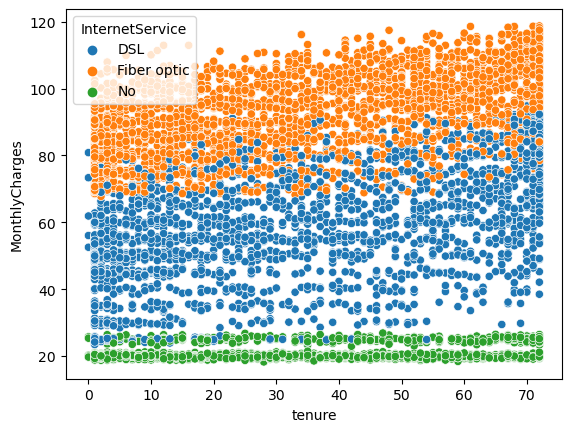

In [4]:
sns.scatterplot(x="tenure",y="MonthlyCharges",hue="InternetService",data=data)

In [5]:
#This showing that the relation between tenure according to their monthlycharges corresponding to internetservices.Fiberoptic have high charges more than DSl. 

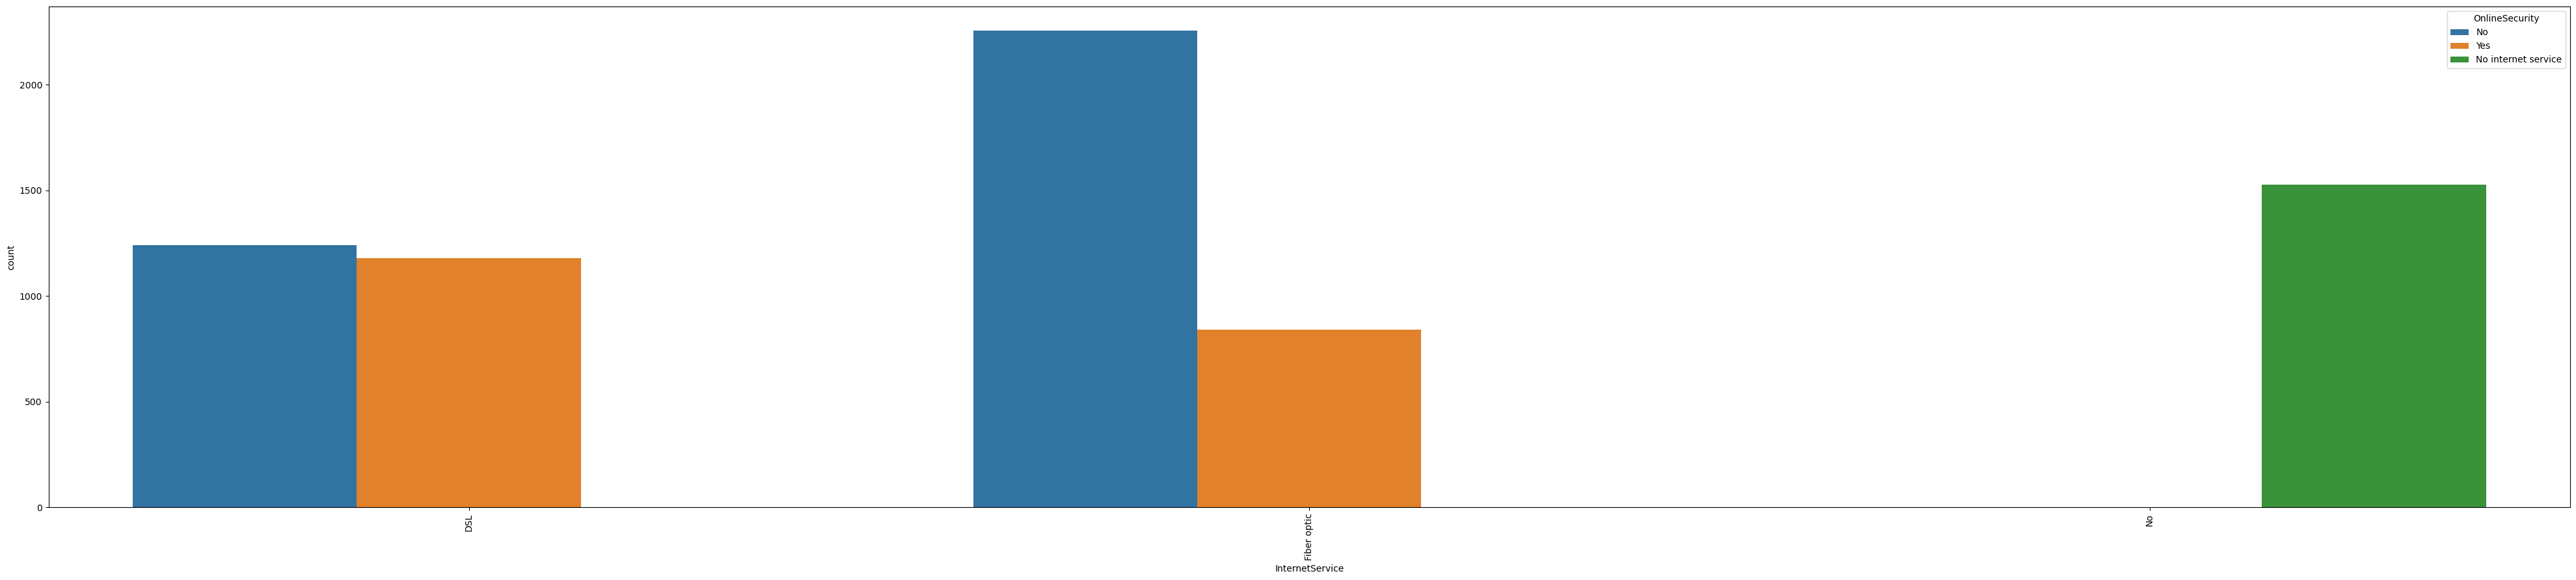

In [6]:
plt.figure(figsize=(50,10))
sns.countplot(data=data,x=data["InternetService"],hue="OnlineSecurity")
plt.xticks(rotation=90)
plt.show()

In [7]:
#Blue graph is showing there is no online connection providing by the Internet Sevices and ornage graph is showing that they are proving.DSl internetservice is far better than the fiberoptic due to their lack in online security. 

In [8]:
data.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object>

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
from sklearn import preprocessing

In [15]:
label_encoder=preprocessing.LabelEncoder()

In [16]:
data["Partner"]=label_encoder.fit_transform(data["Partner"])
data["Partner"].unique()

array([1, 0])

In [19]:
data['Dependents']=label_encoder.fit_transform(data['Dependents'])
data['Dependents'].unique()

array([0, 1])

In [22]:
data['PhoneService']=label_encoder.fit_transform(data['PhoneService'])

In [23]:
data["PhoneService"].unique()

array([0, 1])

In [25]:
data['MultipleLines']=label_encoder.fit_transform(data['MultipleLines'])
data['MultipleLines'].unique()

array([1, 0, 2])

In [26]:
data['InternetService']=label_encoder.fit_transform(data['InternetService'])
data['InternetService'].unique()

array([0, 1, 2])

In [27]:
data['OnlineSecurity']=label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineSecurity'].unique()

array([0, 2, 1])

In [28]:
data['DeviceProtection']=label_encoder.fit_transform(data['DeviceProtection'])
data['DeviceProtection'].unique()

array([0, 2, 1])

In [29]:
data['TechSupport']=label_encoder.fit_transform(data['TechSupport'])
data['TechSupport'].unique()

array([0, 2, 1])

In [30]:
data['StreamingTV']=label_encoder.fit_transform(data['StreamingTV'])
data['StreamingTV'].unique()

array([0, 2, 1])

In [31]:
data['StreamingMovies']=label_encoder.fit_transform(data['StreamingMovies'])
data['StreamingMovies'].unique()

array([0, 2, 1])

In [32]:
data['Contract']=label_encoder.fit_transform(data['Contract'])
data['Contract'].unique()

array([0, 1, 2])

In [33]:
data['PaperlessBilling']=label_encoder.fit_transform(data['PaperlessBilling'])
data['PaperlessBilling'].unique()

array([1, 0])

In [34]:
data['PaymentMethod']=label_encoder.fit_transform(data['PaymentMethod'])
data['PaymentMethod'].unique()

array([2, 3, 0, 1])

In [35]:
data['Churn']=label_encoder.fit_transform(data['Churn'])
data['Churn'].unique()

array([0, 1])

In [37]:
data['gender']=label_encoder.fit_transform(data['gender'])
data['gender'].unique()

array([0, 1])

In [55]:
data['MonthlyCharges']=label_encoder.fit_transform(data['MonthlyCharges'])
data['MonthlyCharges'].unique()

array([142, 498, 436, ..., 594, 289, 874], dtype=int64)

In [66]:
data['TotalCharges']=label_encoder.fit_transform(data['TotalCharges'])
data['TotalCharges'].unique()

array([2505, 1466,  157, ..., 2994, 2660, 5407])

In [77]:
data['tenure']=label_encoder.fit_transform(data['tenure'])
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [100]:
data.drop(["OnlineBackup"],axis=1,inplace=True)

In [101]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,2,142,2505,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,2,0,0,0,1,0,3,498,1466,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,436,157,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,2,2,0,0,1,0,0,266,1400,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,2,729,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,2,2,2,2,1,1,3,991,1597,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,2,0,2,2,1,1,1,1340,5698,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,0,0,0,0,0,1,2,137,2994,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,0,0,0,0,0,1,3,795,2660,1


In [102]:
data.dtypes.value_counts

<bound method IndexOpsMixin.value_counts of customerID          object
gender               int32
SeniorCitizen        int64
Partner              int32
Dependents           int32
tenure               int64
PhoneService         int32
MultipleLines        int32
InternetService      int32
OnlineSecurity       int32
DeviceProtection     int32
TechSupport          int32
StreamingTV          int32
StreamingMovies      int32
Contract             int32
PaperlessBilling     int32
PaymentMethod        int32
MonthlyCharges       int64
TotalCharges         int32
Churn                int32
dtype: object>

In [105]:
x=data.iloc[:,1:18].values
x

array([[   0,    0,    1, ...,    1,    2,  142],
       [   1,    0,    0, ...,    0,    3,  498],
       [   1,    0,    0, ...,    1,    3,  436],
       ...,
       [   0,    0,    1, ...,    1,    2,  137],
       [   1,    1,    1, ...,    1,    3,  795],
       [   1,    0,    0, ...,    1,    0, 1388]], dtype=int64)

In [106]:
y=data.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 1, 0])

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [108]:
x_train

array([[   1,    0,    1, ...,    1,    3,  706],
       [   0,    0,    0, ...,    1,    1, 1467],
       [   0,    0,    1, ...,    0,    0,  837],
       ...,
       [   1,    0,    1, ...,    0,    3,   44],
       [   1,    1,    0, ...,    1,    2,  710],
       [   0,    0,    0, ...,    0,    1,   37]], dtype=int64)

In [109]:
x_test

array([[   0,    0,    0, ...,    0,    2,  510],
       [   1,    0,    0, ...,    1,    1, 1568],
       [   0,    0,    0, ...,    1,    2,  753],
       ...,
       [   0,    0,    0, ...,    1,    1, 1152],
       [   0,    0,    0, ...,    0,    0,   27],
       [   0,    0,    1, ...,    1,    1,  696]], dtype=int64)

In [110]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [111]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
DTC=DecisionTreeClassifier(criterion="gini",min_samples_split=2)
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.663067374867999, 0.9833333333333333, 'x[13] <= 0.5\ngini = 0.391\nsamples = 4695\nvalue = [3445, 1250]'),
 Text(0.4401248936659105, 0.95, 'x[8] <= 0.5\ngini = 0.491\nsamples = 2584\nvalue = [1463, 1121]'),
 Text(0.24655544772762827, 0.9166666666666666, 'x[4] <= 10.5\ngini = 0.5\nsamples = 1749\nvalue = [847, 902]'),
 Text(0.13524718397997496, 0.8833333333333333, 'x[7] <= 0.5\ngini = 0.456\nsamples = 832\nvalue = [293, 539]'),
 Text(0.1025158401126408, 0.85, 'x[4] <= 4.5\ngini = 0.5\nsamples = 315\nvalue = [162, 153]'),
 Text(0.08863618585732165, 0.8166666666666667, 'x[16] <= 463.5\ngini = 0.491\nsamples = 219\nvalue = [95, 124]'),
 Text(0.07683432415519399, 0.7833333333333333, 'x[11] <= 1.0\ngini = 0.482\nsamples = 188\nvalue = [76, 112]'),
 Text(0.06731070087609511, 0.75, 'x[16] <= 384.5\ngini = 0.491\nsamples = 169\nvalue = [73, 96]'),
 Text(0.0589017521902378, 0.7166666666666667, 'x[16] <= 370.5\ngini = 0.498\nsamples = 147\nvalue = [69, 78]'),
 Text(0.05272215269086358, 0.6

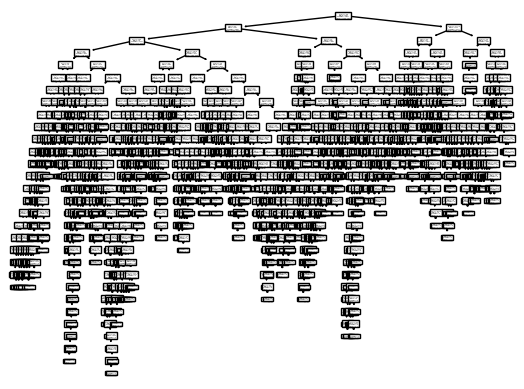

In [114]:
from sklearn import tree
tree.plot_tree(DTC)

In [115]:
y_pred=DTC.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [117]:
from sklearn.metrics import accuracy_score

In [119]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy :",accuracy*100,"%")

accuracy : 72.06132879045997 %


In [124]:
input1=(1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,436)
input1_asarray=np.asarray(input1)
input1_shape=input1_asarray.reshape(1,-1)
prediction=DTC.predict(input1_shape)
print("prediction: ",prediction)

prediction:  [1]


In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
KNN=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=5)
KNN.fit(x_train,y_train)

KNeighborsClassifier(p=5)

In [127]:
y_pred1=KNN.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [130]:
from sklearn.metrics import confusion_matrix

In [131]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[1519,  210],
       [ 342,  277]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted')

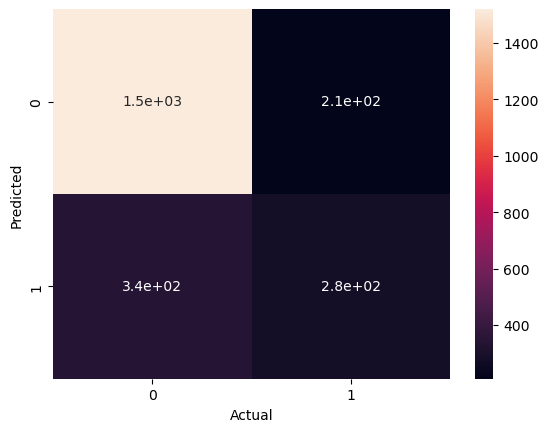

In [132]:
sns.heatmap(cm,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [133]:
accuracy1=accuracy_score(y_test,y_pred1)
print("accuracy : ",accuracy1*100,"%")

accuracy :  76.49063032367974 %


In [135]:
input2=(1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,436)
input2_asarray=np.asarray(input2)
input2_shape=input2_asarray.reshape(1,-1)
prediction=KNN.predict(input2_shape)
print("prediction:",prediction)

prediction: [0]


In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
RFC=RandomForestClassifier(random_state=100)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=100)

In [139]:
y_pred2=RFC.predict(x_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [141]:
cm2=confusion_matrix(y_test,y_pred)
cm2

array([[1398,  331],
       [ 325,  294]], dtype=int64)

Text(50.722222222222214, 0.5, 'Predicted')

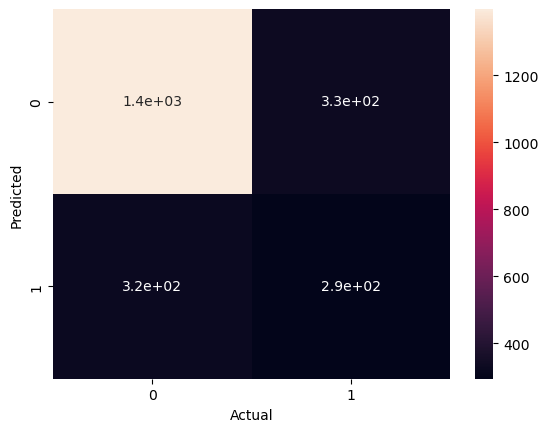

In [142]:
sns.heatmap(cm2,annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [145]:
accuracy2=accuracy_score(y_test,y_pred2)
print("accuracy :",accuracy2*100,"%")

accuracy : 78.2793867120954 %


In [146]:
input3=(1,0,0,0,2,1,0,0,2,0,0,0,0,0,1,3,436)
input3_asarray=np.asarray(input3)
input3_shape=input3_asarray.reshape(1,-1)
prediction=RFC.predict(input3_shape)
print("prediction:",prediction)

prediction: [1]


In [ ]:
#Random forest classifier is more situable (it have more accuracy with correct prediction)